# Solution for Condition 1
## Drawing the state

We will first need to draw a circle The best way to do this using a circle  Algorithm.



In [25]:
from matplotlib import pyplot as plt
import numpy as np


def map_js(A:np.ndarray,func:'function'=None):
    A = np.array(A)
    axes = [np.arange(0,i,1,int) for i in A.shape]
    points = np.meshgrid(*axes)
    print(points)
    
A = np.zeros((10,10))

map_js(A[0])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


In [ ]:
import numpy as np


def heat_dispersion_2d_inv(t0, t1, dt, x0, x1, dx, y0, y1, dy, A , poxels, alpha,const_heat=True):
    """Solves the heat equation with a Gaussian initial condition."""
    
    # Initialize Arrays
    times = np.arange(t0, t1 + dt, dt)
    x = np.arange(x0, x1 + dx, dx)
    y = np.arange(y0, y1 + dy, dy)
    n = np.array([y.shape[0],x.shape[0]])
    
    print(f'Running to time {t1} with Courant number {alpha * dt*(1 / dx**2+1/dy**2)}')
    
    # Initialize Key Parameters
    f = np.zeros((times.shape[0], x.shape[0],y.shape[0]))

    f[0,(0,-1),: ] = f[0, :,(0,-1)] = A  # Boundary conditions
    
    # Perform n time-steps of the FTCS scheme
    for t in range(len(times[1:])):
        # Compute the FTCS update
        f[t+1, 1:-1,1:-1] = f[t, 1:-1,1:-1] + alpha * dt * (((f[t,1:-1,2:] - 2 * f[t,1:-1, 1:-1] + f[t,1:-1, :-2])/dx**2 )+\
            ((f[t,2:,1:-1] - 2 * f[t,1:-1, 1:-1] + f[t,:-2, 1:-1])/dy**2 ))
        
        if const_heat:
            # Enforce boundary conditions
            f[poxels] = A[poxels]
        
    
    return f, x,y, times

Circle Points:


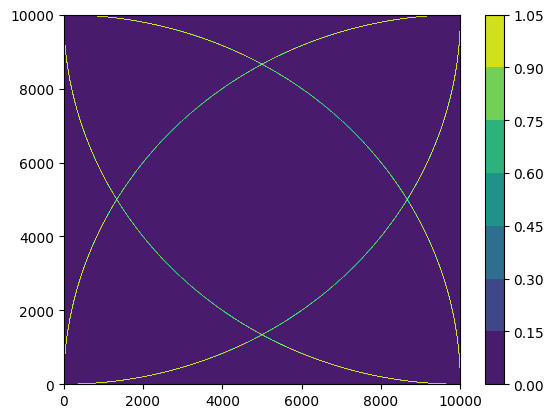

[[0. 1. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[(0, 10000), (0, 10000), (0, -10000), (0, -10000), (10000, 0), (-10000, 0), (10000, 0), (-10000, 0), (1, 10000), (-1, 10000), (1, -10000), (-1, -10000), (10000, 1), (-10000, 1), (10000, -1), (-10000, -1), (2, 10000), (-2, 10000), (2, -10000), (-2, -10000), (10000, 2), (-10000, 2), (10000, -2), (-10000, -2), (3, 10000), (-3, 10000), (3, -10000), (-3, -10000), (10000, 3), (-10000, 3), (10000, -3), (-10000, -3), (4, 10000), (-4, 10000), (4, -10000), (-4, -10000), (10000, 4), (-10000, 4), (10000, -4), (-10000, -4), (5, 10000), (-5, 10000), (5, -10000), (-5, -10000), (10000, 5), (-10000, 5), (10000, -5), (-10000, -5), (6, 10000), (-6, 10000), (6, -10000), (-6, -10000), (10000, 6), (-10000, 6), (10000, -6), (-10000, -6), (7, 10000), (-7, 10000), (7, -10000), (-7, -10000), (10000, 7), (-10000, 7), (10000, -7), (-10000, -7), (8, 10000), (-8

In [ ]:
def midpoint_circle_algorithm(radius, center_x=0, center_y=0):
    """
    Draw a circle using the Midpoint Circle Algorithm.

    Args:
        radius (int): Radius of the circle.
        center_x (int): X-coordinate of the circle's center. Default is 0.
        center_y (int): Y-coordinate of the circle's center. Default is 0.

    Returns:
        list: A list of points on the circle's circumference.
    """
    x = 0
    y = radius
    d = 1 - radius  # Decision parameter
    points = []

    def plot_circle_points(cx, cy, x, y):
        """Plot the eight symmetric points for a given point."""
        points.extend([
            (cx + x, cy + y), (cx - x, cy + y),
            (cx + x, cy - y), (cx - x, cy - y),
            (cx + y, cy + x), (cx - y, cy + x),
            (cx + y, cy - x), (cx - y, cy - x)
        ])

    plot_circle_points(center_x, center_y, x, y)

    while x < y:
        if d < 0:
            # Choose E
            d += 2 * x + 3
        else:
            # Choose SE
            d += 2 * (x - y) + 5
            y -= 1
        x += 1
        plot_circle_points(center_x, center_y, x, y)

    return points




# Example Usage
if __name__ == "__main__":
    radius = 10000
    center_x, center_y = 0, 0
    circle_points = midpoint_circle_algorithm(radius, center_x, center_y)

    print("Circle Points:")
    A = np.zeros((radius+1,radius+1))
    for i in circle_points:
        A[i]=1
    x=np.arange(0,radius+1,1)
    y=np.arange(0,radius+1,1)
    plt.contourf(x,y,A)
    plt.colorbar()
    plt.show()
    print(A)
    print(circle_points)
        


Circle Points:


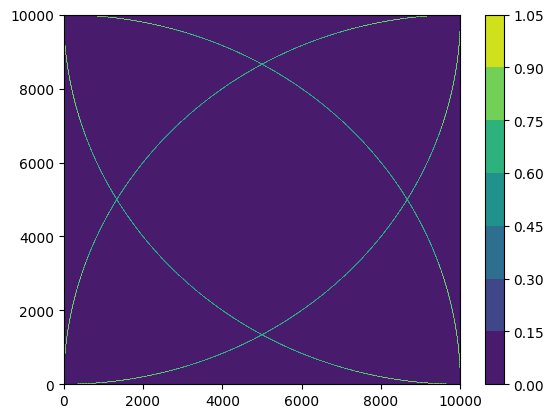

[[0.      1.      0.      ... 0.      0.      1.     ]
 [1.      0.99995 0.9998  ... 0.99955 0.9998  0.99995]
 [0.      0.9998  0.      ... 0.      0.      0.9998 ]
 ...
 [0.      0.99955 0.      ... 0.      0.      0.99955]
 [0.      0.9998  0.      ... 0.      0.      0.9998 ]
 [1.      0.99995 0.9998  ... 0.99955 0.9998  0.99995]]
[(0, 10000, 1.0), (0, 10000, 1.0), (0, -10000, 1.0), (0, -10000, 1.0), (10000, 0, 1.0), (-10000, 0, 1.0), (10000, 0, 1.0), (-10000, 0, 1.0), (1, 10000, 0.9999499999994441), (-1, 10000, 0.9999499999994441), (1, -10000, 0.9999499999994441), (-1, -10000, 0.9999499999994441), (10000, 1, 0.9999499999994441), (-10000, 1, 0.9999499999994441), (10000, -1, 0.9999499999994441), (-10000, -1, 0.9999499999994441), (2, 10000, 0.9998000000014144), (-2, 10000, 0.9998000000014144), (2, -10000, 0.9998000000014144), (-2, -10000, 0.9998000000014144), (10000, 2, 0.9998000000014144), (-10000, 2, 0.9998000000014144), (10000, -2, 0.9998000000014144), (-10000, -2, 0.99980000000141

In [ ]:
import math, pandas as pd


def intensity(distance):
        """Calculate intensity based on the fractional distance to the circle."""
        return max(0, 1 - abs(distance - radius))

def get_intensity(cx, cy, x, y):
        """Plot the eight symmetric points with intensity."""
        dist = math.sqrt((x-cx)**2 + (y-cy)**2)  # Distance from the center
        return intensity(dist)

def non_finite_difference_scheme(radius, Plane:pd.DataFrame,center_x=0, center_y=0):
    """
    Draw a circle using the Midpoint Circle Algorithm with anti-aliasing.

    Args:
        radius (int): Radius of the circle.
        center_x (int): X-coordinate of the circle's center. Default is 0.
        center_y (int): Y-coordinate of the circle's center. Default is 0.

    Returns:
        list: A list of points with their intensities for anti-aliasing.
    """
    x = 0
    y = 0
    d = 1 - radius  # Decision parameter
    points = []
    
    inttensity =get_intensity(center_x, center_y, x, y)
    
    Plane.

    while x < y:
        if d < 0:
            # Choose E
            d += 2 * x + 3
        else:
            # Choose SE
            d += 2 * (x - y) + 5
            y -= 1
        x += 1
        plot_circle_points_antialiased(center_x, center_y, x, y)

    return points




if __name__ == "__main__":
    radius = 10000
    center_x, center_y = 0, 0
    circle_points = midpoint_circle_algorithm_antialiased(radius, center_x, center_y)

    print("Circle Points:")
    A = np.zeros((radius+1,radius+1))
    for i in circle_points:
        A[i[:2]]=1*i[2]
    x=np.arange(0,radius+1,1)
    y=np.arange(0,radius+1,1)
    plt.contourf(x,y,A)
    plt.colorbar()
    plt.show()
    print(A)
    print(circle_points)


In [ ]:
i

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
